<a href="https://colab.research.google.com/github/Shashank14081987/Capstone-project/blob/main/Sarcasm_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project on SARCASM Detection **

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import nltk
#nltk.download()

In [5]:
data = pd.read_json("/content/Sarcasm_Headlines_Dataset.json.zip", lines=True)
data

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [6]:
data.shape

(26709, 3)

In [7]:
data_len = data['headline'].apply(lambda x: len(x.split(' '))).sum()
print(f'We have {data_len} words in the headline')

We have 263026 words in the headline


In [8]:
# check the columns names
data.columns

Index(['article_link', 'headline', 'is_sarcastic'], dtype='object')

In [9]:
data.dtypes

,0
article_link,object
headline,object
is_sarcastic,int64


In [10]:
#checking the unique values in 'is_sarcastic' column
data.is_sarcastic.unique()

array([0, 1])

In [11]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

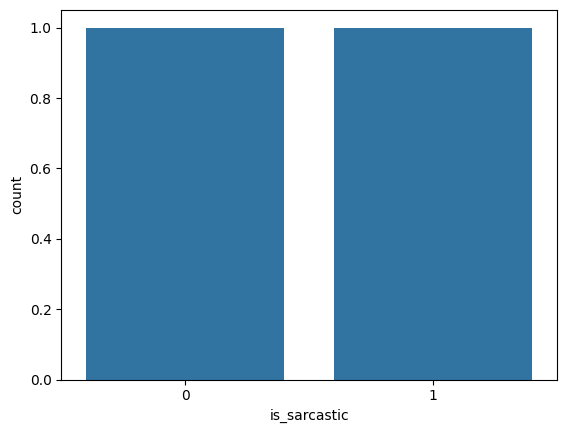

In [12]:
#checking the value counts in 'is_sarcastic' column
data.is_sarcastic.value_counts()
sns.countplot(data['is_sarcastic'].value_counts())
plt.show()

In [13]:
# check the null values in data
data.isna().sum()

,0
article_link,0
headline,0
is_sarcastic,0


In [14]:
#drop 'article_link' column
data = data.drop('article_link', axis=1)

In [15]:
#check the data
data.head(10)

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0
5,advancing the world's women,0
6,the fascinating case for eating lab-grown meat,0
7,"this ceo will send your kids to school, if you...",0
8,top snake handler leaves sinking huckabee camp...,1
9,friday's morning email: inside trump's presser...,0


In [16]:
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

set_stopwords = set(stopwords.words("english"))

def clean_txt(text): # define the fuction with tokenization/string cleaning for all datasets

    text = re.sub(r"[^A-Za-z,!?]", " ", text)
    text = re.sub(r'\[[^]]*\]'," ", text)
    text = re.sub(r"\'s", "", text)
    text = re.sub(r"\'t", "", text )
    text = re.sub(r"\'re", "",text)
    text = re.sub(r"\'d", "", text)
    text = re.sub(r"\'ll", " ",text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\(", " ", text)
    text = re.sub(r"\)", " ", text)
    text = re.sub(r"\'", " ", text)
    text = re.sub(r"aa", "", text)
    text = re.sub(r"zz", "", text)
    text = re.sub(r"[0-9]", ' ', text)
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in set_stopwords)
    return text

data['headline'] = data['headline'].apply(clean_txt)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
data_clean_len = data['headline'].apply(lambda x: len(x.split(' '))).sum()
print(f'After text cleaning we have only {data_clean_len} words to work with')

After text cleaning we have only 187986 words to work with


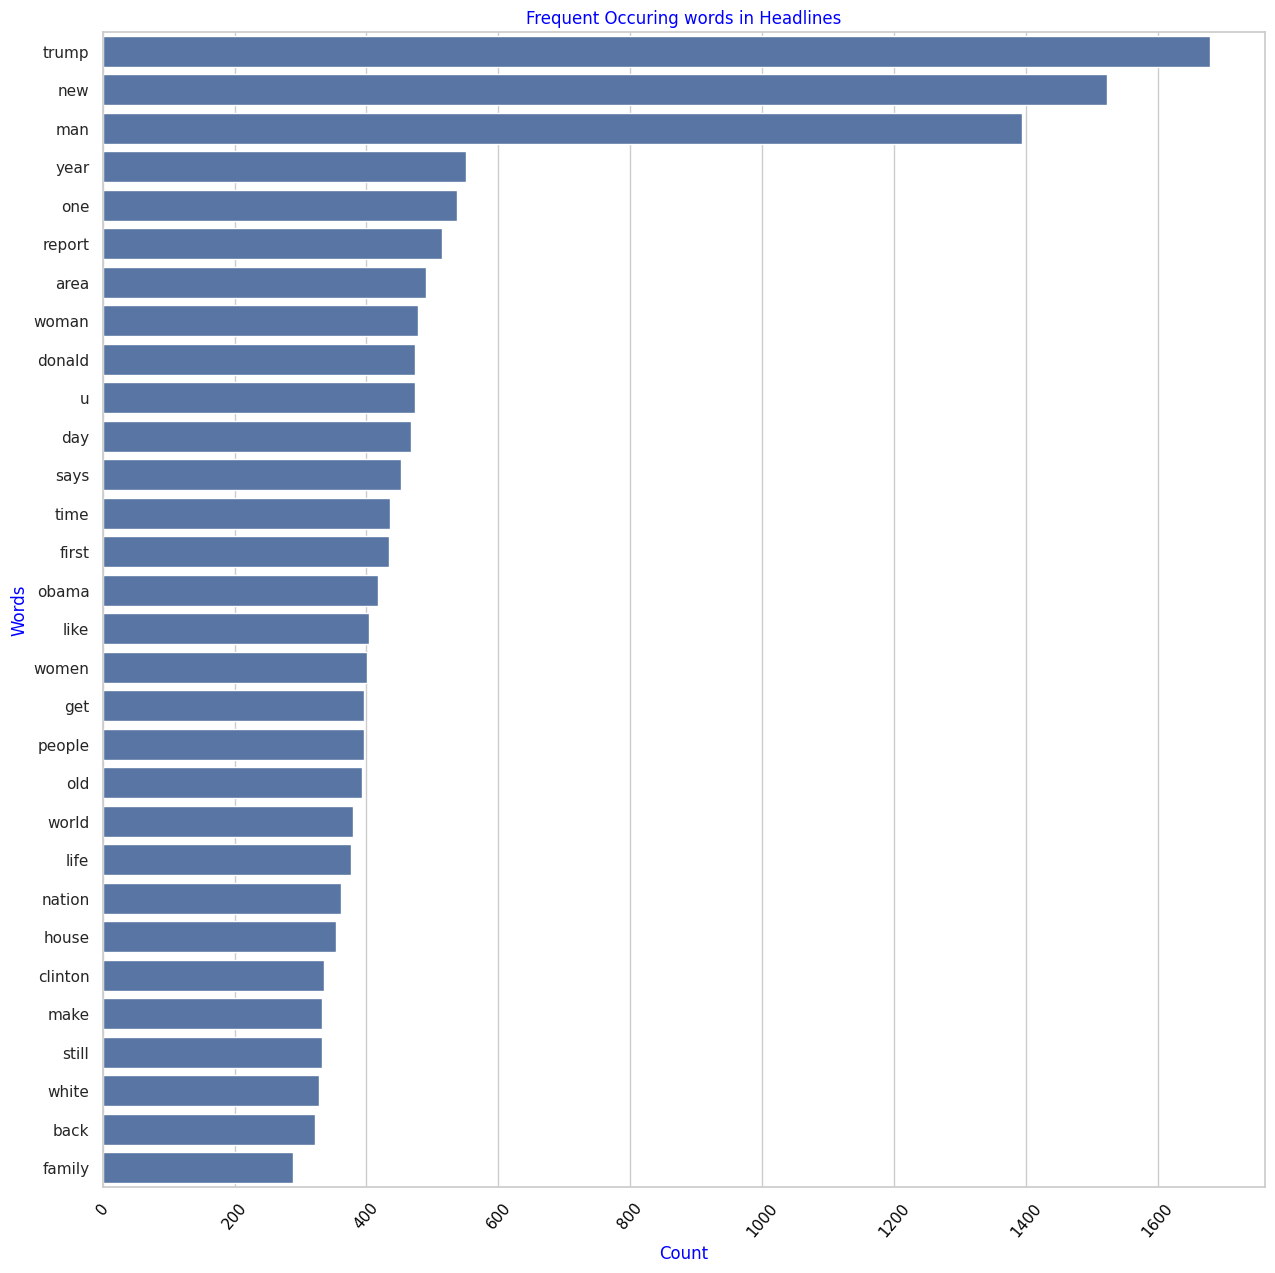

In [18]:
from collections import Counter #import Counter for finding most common words
import seaborn as sns #import searbon for vizualization result

text = data['headline']
words = text.str.split(expand=True).unstack()
result_count = Counter(words).most_common()
result_df = pd.DataFrame(result_count).reset_index().drop(0) #converting to Dataframe and drop the Nones values
#result_df
#vizualize result
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 15))
sns.barplot(y=result_df[0][0:30], x=result_df[1][0:30], data=result_df, palette=None)
plt.ylabel('Words', color="blue")  # Add an x-label to the axes.
plt.xlabel('Count', color="blue")  # Add a y-label to the axes.
plt.title("Frequent Occuring words in Headlines", color="blue")
plt.xticks(rotation=50);
ax.tick_params(axis='x', colors='black')
plt.show()

In [19]:
#create DataFrame for sarcastic words
sarcastic = pd.DataFrame(data[data['is_sarcastic']==1]['headline'].str.split(expand=True).unstack().value_counts()).reset_index()

In [20]:
#create DataFrame for non_sarcastic words
non_sarcastic = pd.DataFrame(data[data['is_sarcastic']==0]['headline'].str.split(expand=True).unstack().value_counts()).reset_index()

In [25]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

sarcasctic_2 = [every_word.lower() for every_word in sarcastic['index']]

sarc_nonstop = [word for word in sarcasctic_2 if word not in stopwords]

non_sarcasctic_2 = [every_word.lower() for every_word in non_sarcastic['index']]

non_sarc_nonstop = [word for word in non_sarcasctic_2 if word not in stopwords]

In [26]:
pip install wordcloud

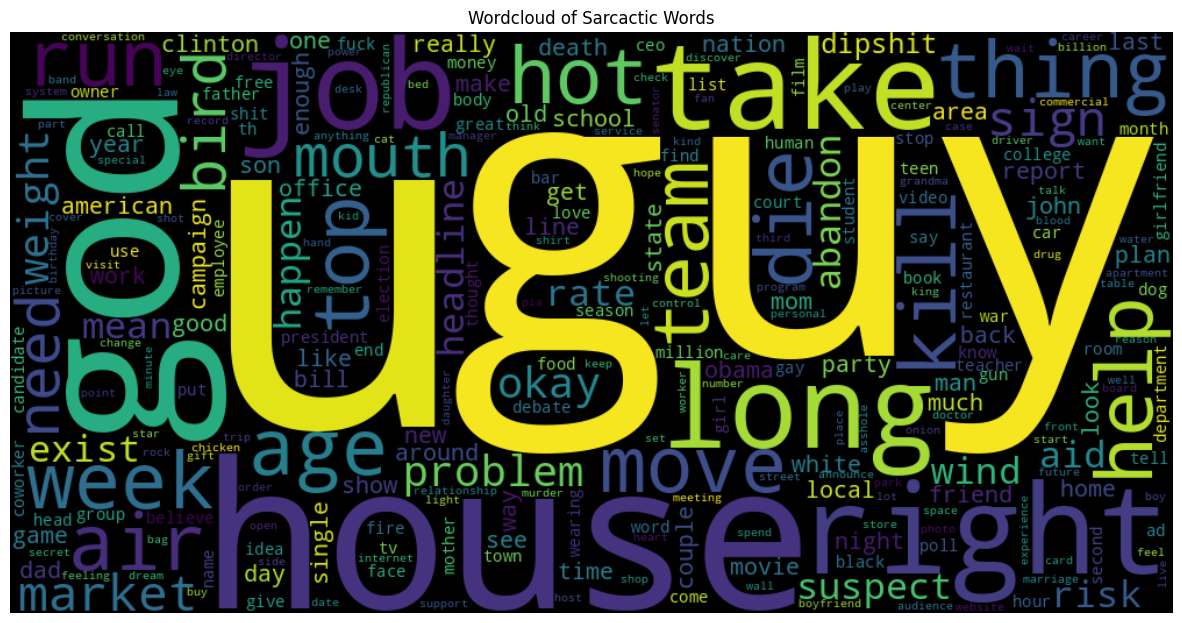

In [27]:
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(15,10))
wordcloud = WordCloud(width=1000, height=500,
                      max_words=300, min_font_size = 10,
                      background_color="black",
                      stopwords = stopwords,
                      ).generate(' ' .join(word for word in sarc_nonstop))

plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud of Sarcactic Words', color="black")
plt.axis("off")
plt.show()

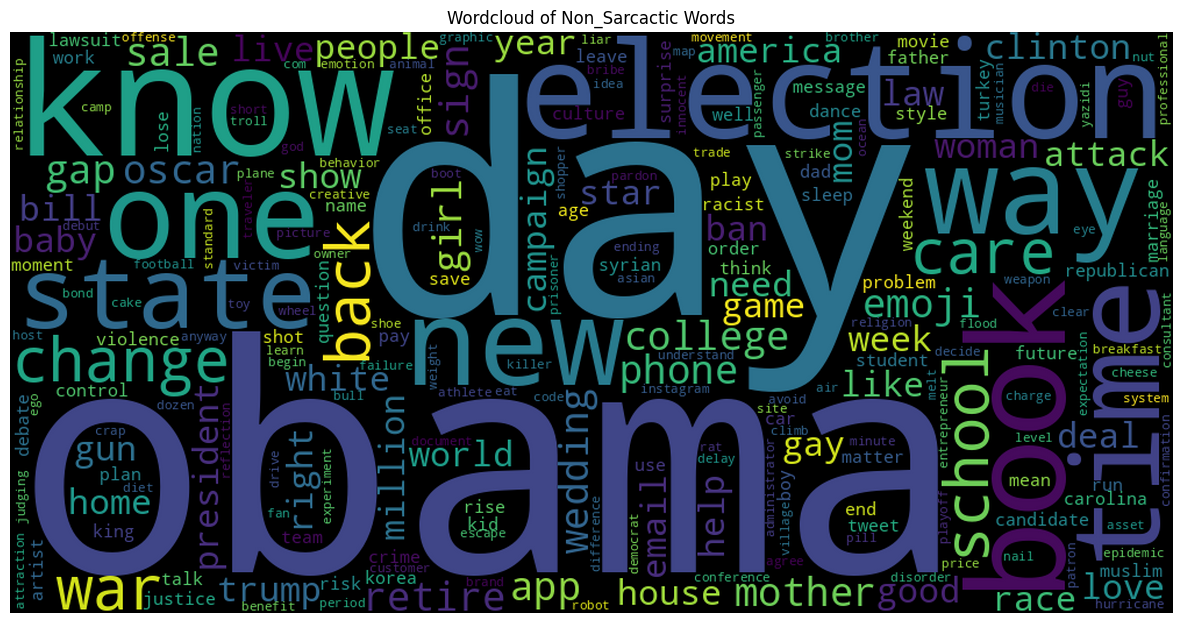

In [28]:
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(15,10))
wordcloud = WordCloud(width=1000, height=500,
                      max_words=300, min_font_size = 10,
                      background_color="black",
                      stopwords = stopwords,
                      ).generate(' ' .join(word for word in non_sarc_nonstop))

plt.imshow(wordcloud, interpolation='spline36')
plt.title('Wordcloud of Non_Sarcactic Words', color="black")
plt.axis("off")
plt.show()

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(data['headline']).toarray()
y = data.iloc[:, -1].values
# Use get_feature_names_out() instead of get_feature_names()
df = pd.DataFrame(X_cv, columns=cv.get_feature_names_out())
df


,ab,abandon,abandoned,abandoning,abandons,abayas,abbas,abbey,abbi,abby,...,zookeeper,zoolander,zoologist,zoologists,zoomed,zoroastrianism,zsa,ztari,zucker,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26704,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26705,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26707,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test = train_test_split(data["headline"], data["is_sarcastic"], test_size = 0.3 , random_state = 0)

In [33]:
max_features = 35000
maxlen = 200

In [35]:
import re,string,unicodedata
# Import text and sequence from the correct path in tensorflow.keras
from tensorflow.keras.preprocessing import text, sequence

In [36]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [37]:
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [53]:
EMBEDDING_FILE ='glove.twitter.27B.50d.txt'
EMBEDDING_FILE

'glove.twitter.27B.50d.txt'

In [54]:
def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

In [57]:
all_embs = np.stack(list(embeddings_index.values()))
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
# Increase the size of the embedding matrix by 1 to accommodate 1-based indexing
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words + 1, embed_size))
for word, i in word_index.items():
    # Ensure index is within the bounds of the created matrix
    if i <= nb_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [58]:
batch_size = 128
epochs = 2
embed_size = 200

In [61]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU
import tensorflow as tf

#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
# Use the embed_size derived from the embedding_matrix (which is 50 from the GloVe file)
model.add(Embedding(nb_words + 1, output_dim=embedding_matrix.shape[1], weights=[embedding_matrix], input_length=200, trainable=True))
#LSTM
model.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.5 , dropout = 0.5)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01), loss='binary_crossentropy', metrics=['acc'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [62]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │     1,054,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,054,400 (4.02 MB)

 Trainable params: 1,054,400 (4.02 MB)

 Non-trainable params: 0 (0.00 B)

In [1]:
history = model.fit(x_train, y_train, batch_size = batch_size , validation_data = (X_test,y_test) , epochs = 10)

NameError: name 'model' is not defined

In [ ]:
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100)

In [ ]:
pred = (model.predict(X_test) > 0.5).astype("int32")
#pred = model.predict_classes(X_test)
pred[:5]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
print(classification_report(y_test, pred, target_names = ['Not Sarcastic','Sarcastic']))

In [ ]:
cm = confusion_matrix(y_test,pred)
cm

In [ ]:
cm = pd.DataFrame(cm , index = ['Not Sarcastic','Sarcastic'] , columns = ['Not Sarcastic','Sarcastic'])
plt.figure(figsize = (7,7))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Not Sarcastic','Sarcastic'] , yticklabels = ['Not Sarcastic','Sarcastic'])